100%|██████████| 9.91M/9.91M [00:00<00:00, 16.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 482kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.84MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.29MB/s]
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 1, Loss: 200.5628, Recon Loss: 194.6456, KL Loss: 5.9172
Epoch 2, Loss: 171.4884, Recon Loss: 166.0853, KL Loss: 5.4031
Epoch 3, Loss: 165.6995, Recon Loss: 160.2868, KL Loss: 5.4127
Epoch 4, Loss: 162.7809, Recon Loss: 157.2730, KL Loss: 5.5079
Epoch 5, Loss: 160.7111, Recon Loss: 155.1340, KL Loss: 5.5771
Epoch 6, Loss: 159.1428, Recon Loss: 153.5207, KL Loss: 5.6221
Epoch 7, Loss: 157.9621, Recon Loss: 152.2993, KL Loss: 5.6629
Epoch 8, Loss: 156.9612, Recon Loss: 151.2725, KL Loss: 5.6887
Epoch 9, Loss: 156.1057, Recon Loss: 150.3801, KL Loss: 5.7256
Epoch 10, Loss: 155.3909, Recon Loss: 149.6362, KL Loss: 5.7547


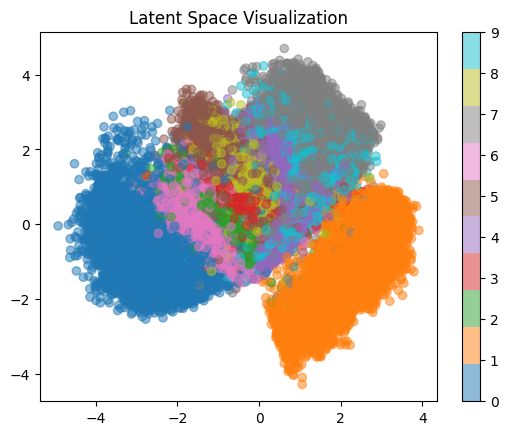

Epoch 1, Loss: 0.0009, Recon Loss: 551.3443, KL Loss: 0.0009
Epoch 2, Loss: 0.0000, Recon Loss: 551.3478, KL Loss: 0.0000
Epoch 3, Loss: 0.0000, Recon Loss: 551.2890, KL Loss: 0.0000
Epoch 4, Loss: 0.0000, Recon Loss: 551.3365, KL Loss: 0.0000
Epoch 5, Loss: 0.0000, Recon Loss: 551.3344, KL Loss: 0.0000
Epoch 6, Loss: 0.0000, Recon Loss: 551.3126, KL Loss: 0.0000
Epoch 7, Loss: 0.0000, Recon Loss: 551.3173, KL Loss: 0.0000
Epoch 8, Loss: 0.0000, Recon Loss: 551.3261, KL Loss: 0.0000
Epoch 9, Loss: 0.0000, Recon Loss: 551.3257, KL Loss: 0.0000
Epoch 10, Loss: 0.0000, Recon Loss: 551.3156, KL Loss: 0.0000


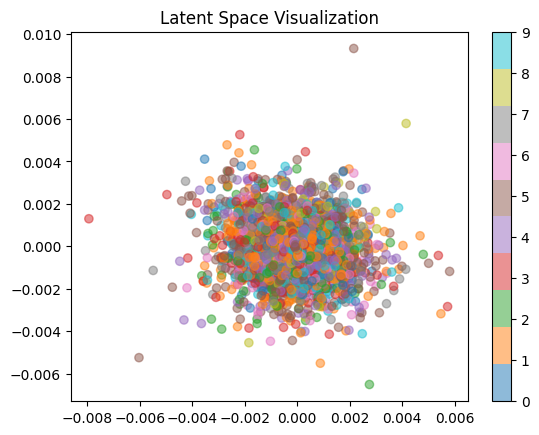

Epoch 1, Loss: 193.5563, Recon Loss: 193.5563, KL Loss: 20.7883
Epoch 2, Loss: 165.9650, Recon Loss: 165.9650, KL Loss: 28.2822
Epoch 3, Loss: 159.9768, Recon Loss: 159.9768, KL Loss: 29.9939
Epoch 4, Loss: 156.6052, Recon Loss: 156.6052, KL Loss: 30.8983
Epoch 5, Loss: 154.1900, Recon Loss: 154.1900, KL Loss: 31.9390
Epoch 6, Loss: 152.3191, Recon Loss: 152.3191, KL Loss: 33.0849
Epoch 7, Loss: 150.9094, Recon Loss: 150.9094, KL Loss: 34.5041
Epoch 8, Loss: 149.8476, Recon Loss: 149.8476, KL Loss: 35.0785
Epoch 9, Loss: 148.8340, Recon Loss: 148.8340, KL Loss: 35.8745
Epoch 10, Loss: 148.1049, Recon Loss: 148.1049, KL Loss: 36.8188


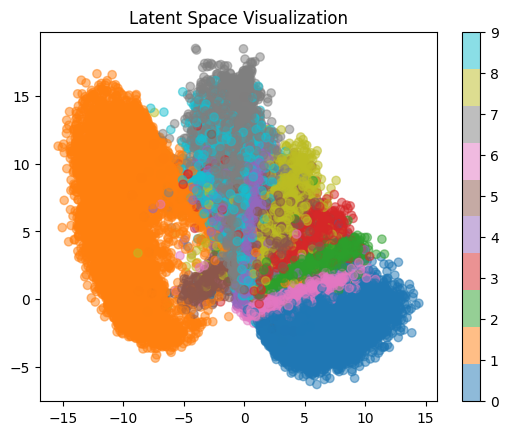

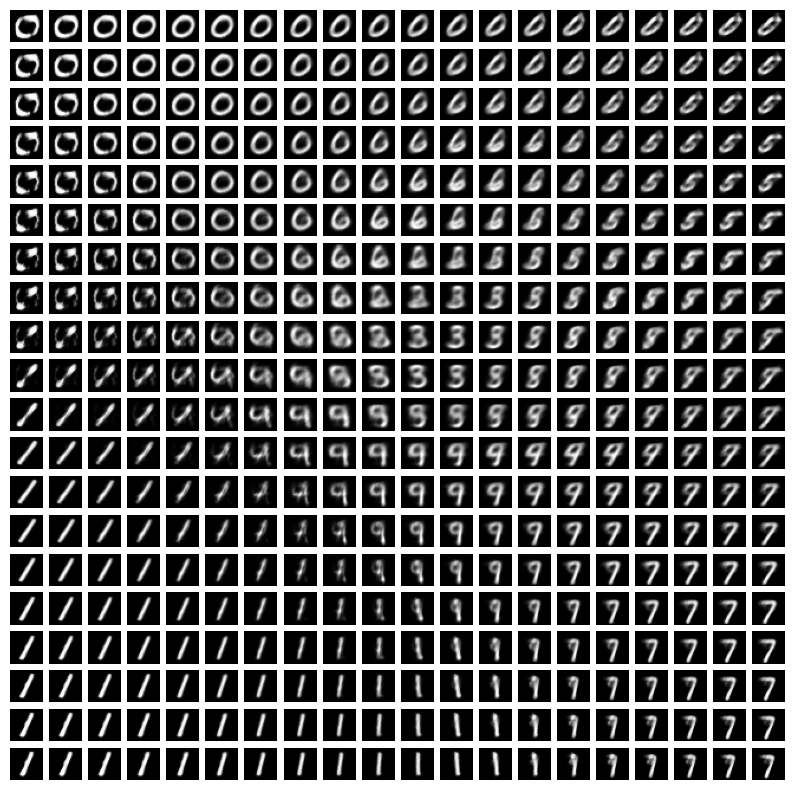

Epoch 1, Loss: 52.1882, Recon Loss: 49.2872, KL Loss: 2.9010
Epoch 2, Loss: 43.8496, Recon Loss: 40.6750, KL Loss: 3.1746
Epoch 3, Loss: 42.2868, Recon Loss: 38.8200, KL Loss: 3.4668
Epoch 4, Loss: 41.5282, Recon Loss: 37.9250, KL Loss: 3.6032
Epoch 5, Loss: 41.0611, Recon Loss: 37.3412, KL Loss: 3.7200
Epoch 6, Loss: 40.7252, Recon Loss: 36.9206, KL Loss: 3.8046
Epoch 7, Loss: 40.4266, Recon Loss: 36.5523, KL Loss: 3.8742
Epoch 8, Loss: 40.1916, Recon Loss: 36.2600, KL Loss: 3.9315
Epoch 9, Loss: 39.9868, Recon Loss: 36.0112, KL Loss: 3.9756
Epoch 10, Loss: 39.8189, Recon Loss: 35.7894, KL Loss: 4.0295


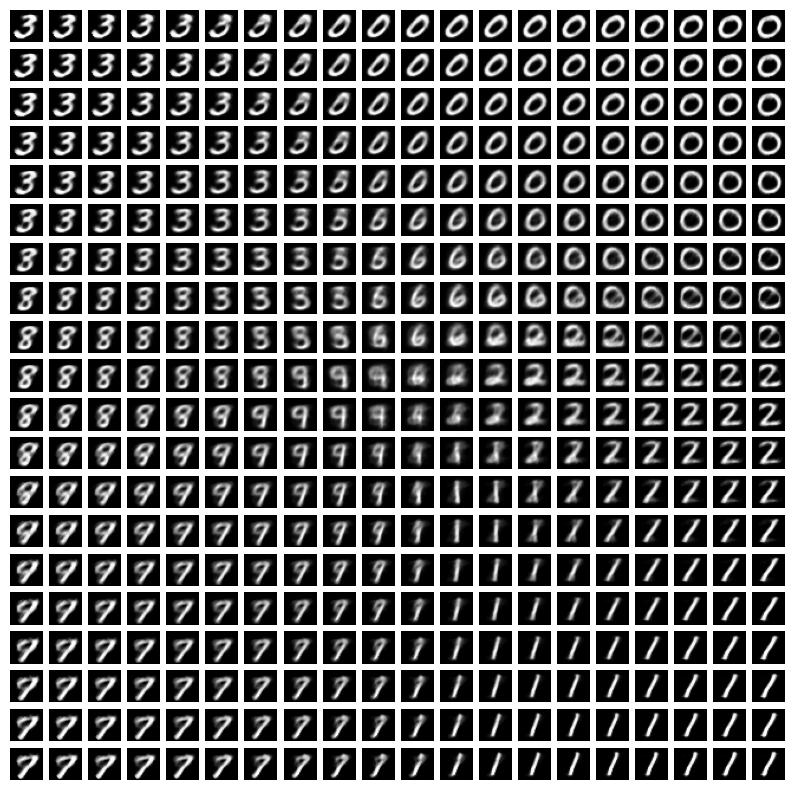

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Define the Variational Autoencoder (VAE) model
class VAE(nn.Module):
    def __init__(self, latent_dim=2):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim

        # Encoder
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2_mean = nn.Linear(512, latent_dim)
        self.fc2_logvar = nn.Linear(512, latent_dim)

        # Decoder
        self.fc3 = nn.Linear(latent_dim, 512)
        self.fc4 = nn.Linear(512, 28 * 28)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc2_mean(h1), self.fc2_logvar(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 28 * 28))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=4, pin_memory=True)

# Define the loss function
def loss_function(recon_x, x, mu, logvar, loss_type="bce"):
    if loss_type == "bce":
        recon_loss = F.binary_cross_entropy(recon_x, x.view(-1, 28 * 28), reduction="sum")
    elif loss_type == "mse":
        recon_loss = F.mse_loss(recon_x, x.view(-1, 28 * 28), reduction="sum")
    else:
        raise ValueError("Invalid loss type")

    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kl_divergence, recon_loss, kl_divergence

# Function to visualize latent space
def visualize_latent_space(model, data_loader, device):
    model.eval()
    latents = []
    labels = []
    with torch.no_grad():
        for data, target in data_loader:
            data = data.to(device).view(-1, 28 * 28)
            _, mu, _ = model(data)
            latents.append(mu.cpu().numpy())
            labels.append(target.numpy())
    latents = np.concatenate(latents, axis=0)
    labels = np.concatenate(labels, axis=0)
    plt.scatter(latents[:, 0], latents[:, 1], c=labels, cmap='tab10', alpha=0.5)
    plt.colorbar()
    plt.title("Latent Space Visualization")
    plt.show()

# Function to sample from a 2D Gaussian Grid and generate images
def generate_from_grid(model, device):
    model.eval()
    grid_x = np.linspace(-3, 3, 20)
    grid_y = np.linspace(-3, 3, 20)
    fig, axes = plt.subplots(20, 20, figsize=(10, 10))
    with torch.no_grad():
        for i, x in enumerate(grid_x):
            for j, y in enumerate(grid_y):
                z = torch.tensor([[x, y]], dtype=torch.float32).to(device)
                recon = model.decode(z).cpu().numpy().reshape(28, 28)
                axes[i, j].imshow(recon, cmap='gray')
                axes[i, j].axis('off')
    plt.show()

# Train the VAE
def train_vae(model, train_loader, epochs=10, loss_type="bce", include_recon=True, include_kl=True):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    model.train()

    for epoch in range(epochs):
        train_loss, recon_loss, kl_loss = 0, 0, 0
        for batch_idx, (data, _) in enumerate(train_loader):
            data = data.to(device, non_blocking=True).view(-1, 28 * 28)
            optimizer.zero_grad()
            recon_batch, mu, logvar = model(data)
            loss, r_loss, kl = loss_function(recon_batch, data, mu, logvar, loss_type=loss_type)

            if not include_recon:
                loss = kl
            elif not include_kl:
                loss = r_loss

            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            recon_loss += r_loss.item()
            kl_loss += kl.item()

        print(f"Epoch {epoch + 1}, Loss: {train_loss / len(train_loader.dataset):.4f}, "
              f"Recon Loss: {recon_loss / len(train_loader.dataset):.4f}, "
              f"KL Loss: {kl_loss / len(train_loader.dataset):.4f}")

    return model

# Instantiate and train the VAE
vae = VAE(latent_dim=2)
trained_vae = train_vae(vae, train_loader, epochs=10, loss_type="bce", include_recon=True, include_kl=True)

# Visualize the latent space
visualize_latent_space(trained_vae, train_loader, torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# Train without reconstruction loss
vae_no_recon = train_vae(VAE(latent_dim=2), train_loader, epochs=10, loss_type="bce", include_recon=False, include_kl=True)
visualize_latent_space(vae_no_recon, train_loader, torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# Train without KL Divergence loss
vae_no_kl = train_vae(VAE(latent_dim=2), train_loader, epochs=10, loss_type="bce", include_recon=True, include_kl=False)
visualize_latent_space(vae_no_kl, train_loader, torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# Generate from 2D Gaussian Grid
generate_from_grid(trained_vae, torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# Train with MSE loss and visualize
vae_mse = train_vae(VAE(latent_dim=2), train_loader, epochs=10, loss_type="mse", include_recon=True, include_kl=True)
generate_from_grid(vae_mse, torch.device("cuda" if torch.cuda.is_available() else "cpu"))


#### Importance of reconstruction loss
When the reconstruction loss is removed (Experiment 2), the model only minimizes the KL divergence. While this forces the latent distributions to align with the prior, it does not encourage the latent codes to capture the features of the data. As a result, the reconstructions are very poor and the latent space does not exhibit any meaningful clustering by digit.

#### Importance of KL divergence loss
In Experiment 3, without the KL divergence loss, the model focuses solely on reconstructing the input. This often leads to an arbitrarily organized latent space (overfitting), which lacks smoothness and continuity. Such a latent space is not well-suited for generating new samples or interpolating between data points.



#### Observations on the grid
##### Clustering of Similar Digits

In the corners or edges of the grid, there are clear examples of a single digit (e.g., many 0’s near the top-left, 9’s or 7’s near the bottom rows). This suggests that each region of the 2D latent space is associated with a particular digit or a small subset of digits.

##### Mixed or Ambiguous Regions

In the middle of the grid some digits look blurry or appear to be a mix of two different digits. These transitional or ambiguous reconstructions highlight how the VAE is morphing one digit representation into another as it moves through latent space.